With the covid data set available from goverment of canada ontario, we will try to derive following insights from it
1. Find out the case recorded in a area in specific day
2. In any group what are the cases recorded so far
3. Find out which group has the maximum and minimum number of out breaks among outbreak groups
4. Find out the public health unit with maximum and minimum recorded cases.
5. Find out how the cases spiked from 2020 to 2021
6. Find out the monthly trend in year 2021



In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:

# Load the data available through the path and explore the dataset.
url ='https://data.ontario.ca/dataset/5472ffc1-88e2-48ca-bc9f-4aa249c1298d/resource/36048cc1-3c47-48ff-a49f-8c7840e32cc2/download/ongoing_outbreaks_phu.csv'
df_raw = pd.read_csv(url)


In [3]:
df_raw.shape 
df_raw.head()

date      phu_name  phu_num     outbreak_group  \
0  2020-11-01  BRANT COUNTY     2227        4 Workplace   
1  2020-11-01  BRANT COUNTY     2227  1 Congregate Care   
2  2020-11-01  CHATHAM-KENT     2240     5 Recreational   
3  2020-11-01  CHATHAM-KENT     2240    6 Other/Unknown   
4  2020-11-01  CHATHAM-KENT     2240        4 Workplace   

   number_ongoing_outbreaks  
0                         1  
1                         2  
2                         1  
3                         1  
4                         1

We can see that there are five columns available and these column represents
 Date: Date in which cases were recoreded
 phu_name: name of the public health unit in which the cases were recorded
 phu_num: Number Assigned to the public health unit.
 outbreak_group: Places were the covid outbreak occured
 number_ongoing_outbreaks: number of recorded covid cases

In [4]:
# lets see  how many times the cases were reported in each public health unit that is how many times the phu appears in the dataset
df_count= df_raw['phu_name'].value_counts()
df_count

PEEL REGION                                2148
TORONTO                                    2110
YORK REGION                                1893
CITY OF HAMILTON                           1803
WATERLOO REGION                            1790
DURHAM REGION                              1762
NIAGARA REGION                             1679
WINDSOR-ESSEX COUNTY                       1653
HALTON REGION                              1629
CITY OF OTTAWA                             1621
MIDDLESEX-LONDON                           1603
SIMCOE MUSKOKA DISTRICT                    1486
WELLINGTON-DUFFERIN-GUELPH                 1453
BRANT COUNTY                               1211
SUDBURY AND DISTRICT                       1189
OXFORD ELGIN-ST.THOMAS                     1046
HALDIMAND-NORFOLK                           955
EASTERN ONTARIO                             926
KINGSTON, FRONTENAC, LENNOX & ADDINGTON     886
THUNDER BAY DISTRICT                        880
CHATHAM-KENT                            

## Insight 1: Find out the case recorded in a area in specific day


In [5]:
# Find out  out breaks is specific month and city.
df_filter_date = df_raw.loc[df_raw['date'] == '2020-11-01']
df_filter_city =df_filter_date.loc[df_filter_date['phu_name'] == 'YORK REGION']
df_filter_city_totaL_outbreaks = df_filter_city['number_ongoing_outbreaks'].sum()
print(" Total outbreak in YORK REGION  in the date 2020-11-01 is:",  df_filter_city_totaL_outbreaks)
df_filter_city



 Total outbreak in YORK REGION  in the date 2020-11-01 is: 62


date     phu_name  phu_num       outbreak_group  \
84  2020-11-01  YORK REGION     2270      6 Other/Unknown   
85  2020-11-01  YORK REGION     2270       5 Recreational   
86  2020-11-01  YORK REGION     2270          4 Workplace   
87  2020-11-01  YORK REGION     2270          3 Education   
88  2020-11-01  YORK REGION     2270  2 Congregate Living   
89  2020-11-01  YORK REGION     2270    1 Congregate Care   

    number_ongoing_outbreaks  
84                         4  
85                         5  
86                        23  
87                        14  
88                         5  
89                        11

Here we can see the out break in York Region including all group was 62 and the divided data as above, We can see the aggregated data for any region at any date. 

In [6]:
# What are the places Categorized for outbreak.
df_outbreak_group= df_raw['outbreak_group'].unique()
df_outbreak_group

array(['4 Workplace', '1 Congregate Care', '5 Recreational',
       '6 Other/Unknown', '3 Education', '2 Congregate Living'],
      dtype=object)

## Insight 2 : In any group what are the cases recorded so far 

In [7]:
outbreaks_by_region =df_raw[df_raw['outbreak_group'] =='1 Congregate Care' ].sum()
outbreaks_by_region


date                        2020-11-012020-11-012020-11-012020-11-012020-1...
phu_name                    BRANT COUNTYCITY OF HAMILTONCITY OF OTTAWADURH...
phu_num                                                              18573050
outbreak_group              1 Congregate Care1 Congregate Care1 Congregate...
number_ongoing_outbreaks                                                52037
dtype: object

Here we have seen that in 1 Congregate care there has been total 52037 number of out breaks recorded similary we can achieve the insight for any other places that are workplace, Education, living and other.

## Insight 3:  Find out which group has the maximum  and minimum  number of out breaks among outbreak groups 

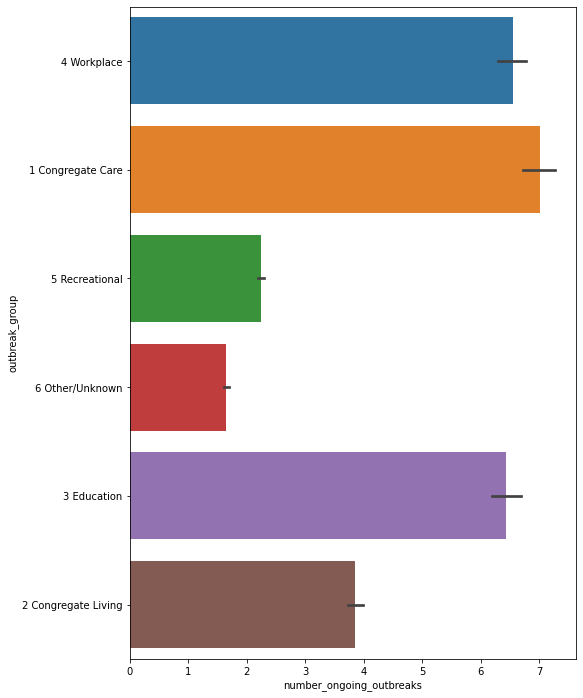

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,12))
plot = sns.barplot(df_raw['number_ongoing_outbreaks'], df_raw['outbreak_group'])

Here we can see that congregate care recorded the highest hits and other/unknown sector have minimum outbreak.

## Insights 4: Find out the public health unit with maximum and minimum recorded cases.

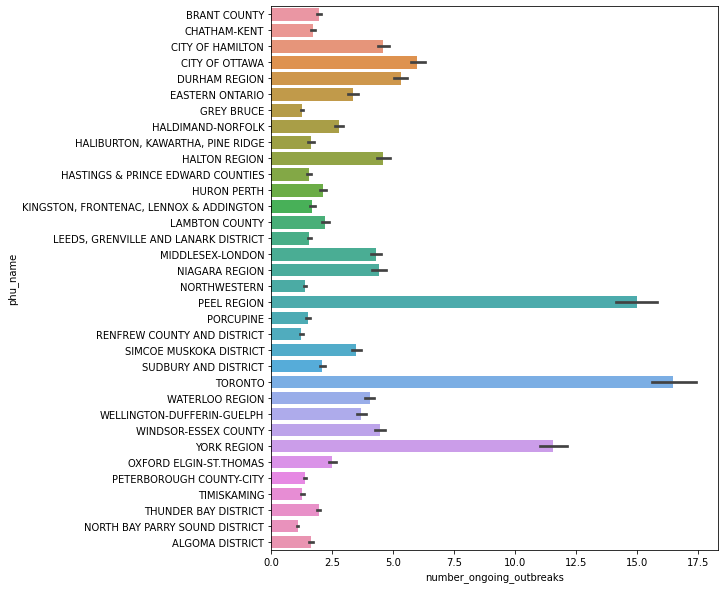

In [9]:
# Find out which phu has the maximun and minimum out breaks
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,10))
plot = sns.barplot(df_raw['number_ongoing_outbreaks'], df_raw['phu_name'])

From the graph it is cleary seen that TORONTO has the maximum cases recorded and NORTH BAY PARRY SOUND DISTRICT has the least outbreak recorded.

In [10]:
#  lets grab the  total number of out breaks in a region
df_total_city = df_raw[df_raw['phu_name'] =='NORTH BAY PARRY SOUND DISTRICT' ].sum()
df_total_city

date                        2020-11-252020-11-262020-11-272020-11-282020-1...
phu_name                    NORTH BAY PARRY SOUND DISTRICTNORTH BAY PARRY ...
phu_num                                                                772968
outbreak_group              5 Recreational5 Recreational5 Recreational5 Re...
number_ongoing_outbreaks                                                  371
dtype: object

Here we see that NORTH BAY PARRY SOUND DISTRICT has 371 of the recorded cases .

## Insight 5 Find out how the cases spiked from 2020 to 2021

To do that, it would be easier if we had seperate month and year column so lets do that

In [11]:
# add new column year and month for ease of processing 
df_raw['year'] = pd.DatetimeIndex(df_raw['date']).year
df_raw['month'] = pd.DatetimeIndex(df_raw['date']).month
df_raw


date      phu_name  phu_num       outbreak_group  \
0      2020-11-01  BRANT COUNTY     2227          4 Workplace   
1      2020-11-01  BRANT COUNTY     2227    1 Congregate Care   
2      2020-11-01  CHATHAM-KENT     2240       5 Recreational   
3      2020-11-01  CHATHAM-KENT     2240      6 Other/Unknown   
4      2020-11-01  CHATHAM-KENT     2240          4 Workplace   
...           ...           ...      ...                  ...   
37904  2021-12-07   YORK REGION     2270      6 Other/Unknown   
37905  2021-12-07   YORK REGION     2270          4 Workplace   
37906  2021-12-07   YORK REGION     2270          3 Education   
37907  2021-12-07   YORK REGION     2270  2 Congregate Living   
37908  2021-12-07   YORK REGION     2270    1 Congregate Care   

       number_ongoing_outbreaks  year  month  
0                             1  2020     11  
1                             2  2020     11  
2                             1  2020     11  
3                             1  2020     11  
4                             1  2020     11  
...                         ...   ...    ...  
37904                         1  2021     12  
37905                         3  2021     12  
37906                        16  2021     12  
37907                         1  2021     12  
37908                         1  2021     12  

[37909 rows x 7 columns]

<AxesSubplot:xlabel='year'>

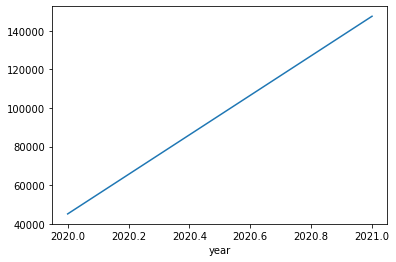

In [12]:
# How the cases spike from 2020 to 2021
df_yearly_group = df_raw.groupby(['year'])['number_ongoing_outbreaks'].sum()
df_yearly_group.describe
df_yearly_group.plot()

We can see the number escalating from 40000 to 140000 here.

## Insights 6: Find out the monthly trend in year 2021

<AxesSubplot:xlabel='month'>

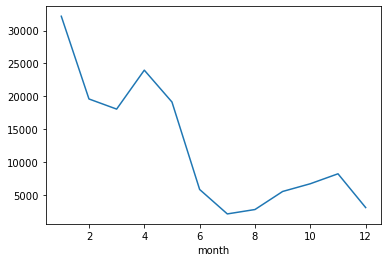

In [13]:
# See the monthly trend for 2021 lets filter out the data for year 2021 and group by months to see the trend
df_monthly = df_raw[df_raw['year'] == 2021]
df_monthly_group = df_monthly.groupby(['month'])['number_ongoing_outbreaks'].sum()
df_monthly_group.describe
df_monthly_group.plot()



We can see the decreasing trend in from the begining of 2021 to end. 